In [34]:
from IPython.display import display, Latex # import display and Latex from IPython.display

<h4><strong>Classification</strong></h4>

This notebook introduces the concept of a classification task.

The data is produced from the MNIST database of handwritten digits that is commonly used for training various image processing systems and machine learning models.

In [35]:
# sklearn allows the direct import of the MNIST dataset

from sklearn.datasets import fetch_openml # import fetch_openml function from sklearn.datasets
mnist = fetch_openml('mnist_784', as_frame=False) # fetch the MNIST dataset and store it in the variable mnist

<h4><strong>MNIST Dataset</strong></h4>

The MNIST data set consist of 70,000 small images (28 px by 28 px), with each image having 784 features (obviously being the sum of 28 x 28).

Because image files do not present well in a DataFrame, we have used the argument <strong>as_frame=False"</strong> in downloading - this ensures the dataset is loaded as a NumPy array.

This is explained as...

<strong>X data (images):</strong>

1. Stored as 1D: Each image is a flat list of 784 numbers (pixel values)
2. Reshaped to 2D (28×28) when you want to VIEW it as an actual image
3. Stays 1D for training the machine learning model

<strong>y data (labels):</strong>

1. Always 1D: Just a simple list of labels
2. No reshaping needed - it's already in the right format


In [36]:
X, y = mnist["data"], mnist["target"] # split the dataset into features (X) and labels (y).  This is known because the composition of the MNIST dataset is already known.

Because a NumPy Array is not hugely helpful in visualising image data, MatPlotLib can be used to select an image from the X data set and visualise it.

Below is a function that takes one argument (chosen from a random choice within the data set) and displays it.

In [37]:
import matplotlib.pyplot as plt # import matplotlib for plotting

def plot_digit(image_data): # define a function to plot a digit
    image = image_data.reshape(28, 28) # reshape the flat image data into a 28x28 array
    plt.imshow(image, cmap="binary") # display the image in binary color map
    plt.axis("off") # turn off the axis
    plt.show() # show the plot

We can now take a random election from the X data set, see it visualised and see the corresponding label from the y data set.

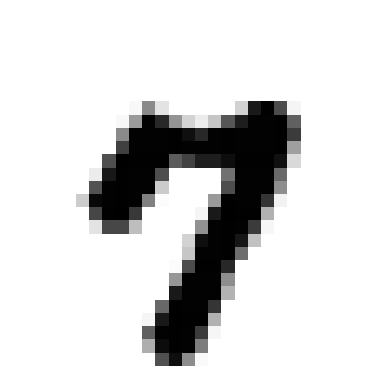

Label: 7


In [38]:
import random # import random module to select a random digit

random_number = random.randint(0, len(X)-1) # generate a random index within the range of the dataset

plot_digit(X[random_number]) # plot a random digit from the dataset
print("Label:", y[random_number]) # print the label of the randomly selected digit

<h4><strong>Train & Test Data - Split</strong></h4>

The MNIST data is already randomly shuffled, so all we need to do is split between Train and Test data sets.

There are 70,000 images / labels.  We will take 60,000 as training data and 10,000 as test data.


In [39]:
X_train, X_test = X[:60000], X[60000:] # split the data into training and test sets
y_train, y_test = y[:60000], y[60000:] # split the labels into training and test sets

 
# The key syntax here is the : operator, which is used for slicing arrays in Python.
# In this case, X[:60000] means "take all rows from the beginning up to (but not including) index 60000".
# Similarly, X[60000:] means "take all rows from index 60000 to the end of the array".
# This effectively splits the dataset into two parts: the first 60,000 samples for training and the remaining 10,000 samples for testing.

The data process thus far can be visualised as

<img src="images\data_flow.png" width="25%">

<h4><strong>Binary Classifier</strong></h4>

In the first stage we are going to identify if a number is "5" or not.  This is a binary option - the presented number is either a "5" or it isnt.

To do this we initially need to apply a boolean value to the "5s" in the labelled data.

This is possible because the y data contans the labels for the X data.

In [40]:
y_train_five = (y_train == '5') # create a binary target variable for digit '5' in training set
y_test_five = (y_test == '5') # create a binary target variable for digit '5' in test set

In [41]:
from sklearn.linear_model import SGDClassifier # import SGDClassifier from sklearn.linear_model
sgd_clf = SGDClassifier(random_state=42) # create an instance of SGDClassifier with a fixed random state
sgd_clf.fit(X_train, y_train_five) # train the classifier on the training data to recognise digit '5'

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [42]:
known_five = X[0] # select the first image from the dataset (which is known to be a '5') - This is known from prior knowledge of the dataset and the image is in "flat" format.
sgd_clf.predict([known_five]) # predict whether the first image is a '5' or not

array([ True])

In the above code, we've taken the labelled data (y) and applied a Boolean score marker to whether each image in the training data is a 5 or not.

We've then created an instance of an SGD Classifier and trained it using the X training data (the image pixel values) and the y_train_five Boolean labels, so it learns to classify whether an image is a 5 or not.

Finally, we passed a known image into the classifier and it correctly identified it as a 5.

In the previous regression work, we used k-fold cross validation to check the accuracy of the predictions.

K-fold cross-validation is a way to test how well a machine learning model will perform on new data it hasn't seen before.

Instead of splitting your data just once into a training set and a test set, you split it into k equal parts (or "folds"). Then you train and test your model k times, each time using a different fold as the test set and the remaining folds as the training set.

For example, with 5-fold cross-validation:

Round 1: Use folds 2-5 for training, fold 1 for testing

Round 2: Use folds 1, 3-5 for training, fold 2 for testing

Round 3: Use folds 1-2, 4-5 for training, fold 3 for testing

And so on...

After all k rounds, you average the results to get an overall estimate of how well your model performs.

For this classification task, cross validation won't work as well as, whilst predictions on "True" for identifying 5s will be high, predicting "False" will also be hih ...largely down to the fact that even if you simply guessed "False" for every answer, you'd still score 90% accuracy due to only 10% of the data being "True". 

This is not a solid determinant of accuracy.

A <strong>Confusion Matrix</strong> is a better option.

A confusion matrix is a simple table that helps you see how well a classification model is performing by showing what it predicted versus what was actually true.  There are four results in a confusion matrix.

1. True Negative (TN): The model correctly identified the negative result (i.e.it wasn't what was being classified) - this is the negative class / true negatives
2. False Positive (FP): The model incorrectly identified the result - these are false positives / type 1 errors
3. False Negative (FN): The model incorrectly identified the negative result (i.e. it was wrongly classified, the classifier thought it was a class of something that it wasn't)
4. Tru Positive (FP): The model correctly identifies the result

The confusion matrix displays these four numbers in a 2×2 grid:

In [43]:
from sklearn.model_selection import cross_val_predict # import cross_val_score
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_five, cv=3) # perform cross-validation to get predictions for the training set

# this creates an array of boolean values indicating whether each prediction is correct (True) or incorrect (False).
# the train set is used here because we are evaluating the model's performance on the data it was trained on.
# this returns an array of predictions for each instance in the training set, obtained through cross-validation.

In [44]:
from sklearn.metrics import confusion_matrix # import confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_train_five, y_train_pred) # compute the confusion matrix for the training set predictions
cm

array([[53892,   687],
       [ 1891,  3530]])

In the above confusion matrix, we can see that;

1. True Negatives - the matrix correctly classified 53,892 non-5s
2. False Positives - the matrix incorrectly classified 687 instances as 5
3. False Negatives - the matrix incorrectly classified 1,891 5s as non-5s
4. True Positives - the matrix correctly classified 3,530 5s as 5s

A perfect confusion matrix would look like - 

<img src="images\perfect_classifier.png" width="50%">

whilst the above gives numbers, it's necessary to understand the value of these.  This can be done by measuring the precision and recall metrics of a confusion matrix.

<strong>Precision</strong> is the mechanism by which you calculate "of all the items my model predicted as positive, how many were actually positive?"

It is calculated via the formula...

$\text{precision} = \frac{TP}{TP + FP}$

<strong>Recall</strong> is the mechanism by which you calculate "Of all the actual positive items, how many did my model find?"

It is calculated via the formula...

$\text{recall} = \frac{TP}{TP + FN}$

An illustrated example of a confusion matrix alongside presicion and recall is - 

<img src="images\cm_illustration.png" width="25%">

The precision and recall scores for our SGD Classifier are...

In [45]:
from sklearn.metrics import precision_score, recall_score # import precision_score and recall_score from sklearn.metrics
precision = precision_score(y_train_five, y_train_pred) # calculate precision for the training
recall = recall_score(y_train_five, y_train_pred) # calculate recall for the training

precision = round(precision * 100, 2)
recall = round(recall * 100, 2)

print(f"Precision: {precision}% accurate in identifying the digit 5") # print precision
print(f"Recall: {recall}% accurate in detecting the digit 5") # print recall

Precision: 83.71% accurate in identifying the digit 5
Recall: 65.12% accurate in detecting the digit 5


These scores can be combined into a value known as the <strong>F1</stron> score.

$F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} = \frac{TP}{TP + \frac{FP + FN}{2}}$

In [46]:
from sklearn.metrics import f1_score # import f1_score from sklearn.metrics
f1 = f1_score(y_train_five, y_train_pred) # calculate F1 score for the training set
f1 = round(f1 * 100, 2) # round F1 score to two decimal places
print(f"F1 Score: {f1}%") # print F1 score

F1 Score: 73.25%


The F1 score seeks to provide a harmonious score of precision and recall and favours classifiers which have similar scores.

This might <strong>not</strong> be what is needed!

For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product. 

On the other hand, suppose you train a classifier to detect shoplifters in surveillance images: it is probably fine if your classifier only has 30% precision as long as it has 99% recall (security guards will get a few false alerts, but almost all shoplifters will get caught).

This leads to a precison vs recall trade off that can be tweaked using the algorithm's decision threshold.

<img src="images\decision_threshold.png" width="30%">


Increasing precision can lower recall.  Increasing recall can decrease precesion.

In the code below we are randomly select a random instance from the training data and we use the trained classifier via the <strong>decision_method()</strong> method to score the confidence of a single prediction.

A high positive is good confidence.  A low negative is low confidence

In [47]:
random_number = random.randint(0, len(X_train)-1) # generate a random index within the range of the training dataset
some_digit = X_train[random_number] # select a random digit from the training set

y_scores = sgd_clf.decision_function([some_digit]) # get a decision score for the random digit
y_scores # display the decision scores

array([-6793.92689502])

I've repeated this with a list of numbers to show how confident each decision is.

In [48]:
list_of_nums = [] # create an empty list to store confidence scores

for i in range(10):
    random_number = random.randint(0, len(X_train)-1) # generate a random index within the range of the training dataset
    some_digit = X_train[random_number] # select a random digit from the training set
    confidence_score = sgd_clf.decision_function([some_digit]) # get a decision score for the random digit
    list_of_nums.append(confidence_score) # append the confidence score to the list

list_of_nums # display the list of confidence scores

[array([-2963.30742423]),
 array([-4134.44201534]),
 array([-10597.28745589]),
 array([-22743.26138699]),
 array([1249.18502486]),
 array([-2335.61405364]),
 array([-15282.44711596]),
 array([-10301.38617314]),
 array([-12184.70894584]),
 array([-3341.27690878])]

We can adjust the threshold to change our precision - demonstrated below using the known_five variable and then adjsuting the precision threshold - increasing threshold can decrease precision.

In [49]:
# Get the decision function score for the known digit
decision_score = sgd_clf.decision_function([known_five])[0]
print(f"Decision Score: {decision_score:.4f}")
print()

# Test different thresholds to see how precision/recall changes
thresholds = [0, 1000, 2000, 3000]

for threshold in thresholds:
    y_pred = (decision_score > threshold)
    print(f"Threshold: {threshold:>4} → Prediction: {y_pred} (Is '5': {y_pred})")

Decision Score: 2164.2203

Threshold:    0 → Prediction: True (Is '5': True)
Threshold: 1000 → Prediction: True (Is '5': True)
Threshold: 2000 → Prediction: True (Is '5': True)
Threshold: 3000 → Prediction: False (Is '5': False)


To decide the sweet spot for precision we can plot all the decision scores and plot these.

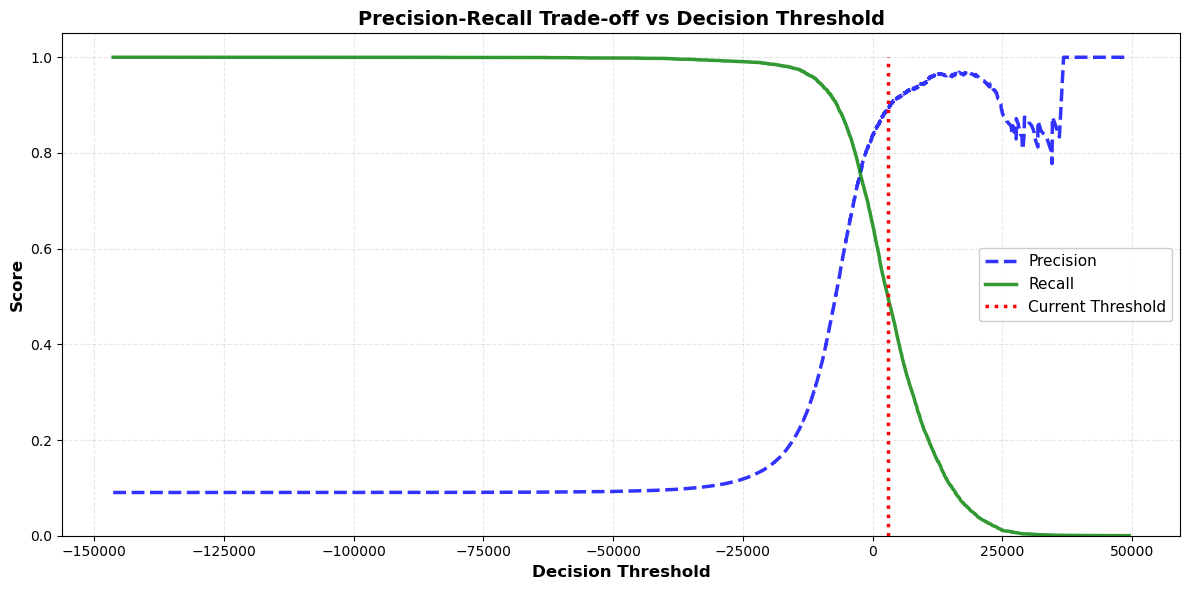

In [50]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_five, cv=3, method="decision_function") # get decision scores for all instances in the training set using cross-validation

from sklearn.metrics import precision_recall_curve # import precision_recall_curve from sklearn.metrics
precisions, recalls, thresholds = precision_recall_curve(y_train_five, y_scores) # compute precision-recall pairs for different thresholds

# Plotting Precision and Recall vs Decision Threshold
plt.figure(figsize=(12, 6)) # set figure size
plt.plot(thresholds, precisions[:-1], "b--", linewidth=2.5, label="Precision", alpha=0.8) # plot precision vs. thresholds
plt.plot(thresholds, recalls[:-1], "g-", linewidth=2.5, label="Recall", alpha=0.8) # plot recall vs. thresholds
plt.vlines(threshold, 0, 1.0, "r", "dotted", linewidth=2.5, label=f"Current Threshold") # add a vertical line for the current threshold

#plot formatting
plt.xlabel("Decision Threshold", fontsize=12, fontweight='bold') # add x-axis label
plt.ylabel("Score", fontsize=12, fontweight='bold') # add y-axis label
plt.title("Precision-Recall Trade-off vs Decision Threshold", fontsize=14, fontweight='bold') # add title
plt.legend(loc="best", fontsize=11, framealpha=0.95) # add legend
plt.grid(True, alpha=0.3, linestyle='--') # add grid for better readability
plt.ylim([0, 1.05]) # set y-axis limits
plt.tight_layout() # adjust layout to prevent label cutoff
plt.show() # display the chart

Here we can see that as precision reaches around 90%, recall drops to about 50%.  Conversly, the higher the recall, the lower the precision.

By eye, the sweet spot seems to be a precsin / recall score of about 78%

Let's identify where the threshold for this is;

In [72]:
for_best_score = (precisions >= 0.78).argmax() # find the index of the first threshold where precision is at least 78%
best_threshold = thresholds[for_best_score] # get the corresponding threshold
print(f"Best estimated threshold for precision & recall >= 78%\nThis results in a threshold of {best_threshold:.2f}") # print the best threshold

Best estimated threshold for precision & recall >= 78%
This results in a threshold of -1935.74


Now lets make predictions using the best threshold and then check the precison and recall scores at that threshold

In [ ]:
y_train_pred_best = (y_scores >= best_threshold) # make predictions using the best threshold
precision_score(y_train_five, y_train_pred_best) # calculate precision for the best threshold
print(f"The precision score at the best threshold is: {precision_score(y_train_five, y_train_pred_best):.4f}")

The precision at the best threshold is: 0.7801


In [ ]:
recall_score(y_train_five, y_train_pred_best) # calculate recall for the best threshold
print(f"The recall score at the best threshold is: {recall_score(y_train_five, y_train_pred_best):.4f}")

The recall at the best threshold is: 0.7375


Tweaking the threshold affects the precision and rcall scores - the actual best is 0.775 😃